In [165]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ton_iot = pd.read_csv('NF-BoT-IoT-v2.csv')
ton_iot_copy = ton_iot.copy()
ton_iot_copy.shape

(37763497, 45)

In [166]:
ton_iot_copy.shape

(37763497, 45)

## Correlation

In [ ]:
categorical_feature = ['L4_SRC_PORT','L4_DST_PORT','IPV4_SRC_ADDR',
                       'IPV4_DST_ADDR','PROTOCOL','L7_PROTO','DNS_QUERY_TYPE','ICMP_TYPE'
                        ,'ICMP_IPV4_TYPE','DNS_TTL_ANSWER']

not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']

tagets = ['Attack','Label']

to_drop = categorical_feature+not_used+tagets

X_corr_vif = ton_iot.drop(columns=to_drop)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = X_corr_vif.corr()
corr.style.background_gradient(cmap='coolwarm')

,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT
IN_BYTES,1.000000,0.855326,0.370988,0.604972,-0.000720,0.001128,-0.000325,0.001179,-0.001573,0.010073,0.014105,0.014105,0.165306,0.022248,0.047363,0.165306,0.017142,0.004632,0.040199,0.039902,0.000223,0.000016,0.862612,0.296703,0.051222,0.200677,0.511532,0.823033,0.800009,0.000967,0.000574
IN_PKTS,0.855326,1.000000,0.413094,0.638092,-0.003437,-0.001049,-0.002794,0.004029,0.000497,0.010947,0.021680,0.021680,0.072113,0.023623,0.048819,0.072113,0.019255,0.005057,0.148488,0.148421,0.005254,0.001714,0.742289,0.328259,0.264011,0.241739,0.643802,0.908562,0.877931,0.001460,0.000757
OUT_BYTES,0.370988,0.413094,1.000000,0.687861,0.000770,0.003760,0.001181,0.000383,-0.001655,0.010807,0.006173,0.006173,0.228523,0.010213,0.050857,0.228523,0.009022,0.004807,-0.000012,-0.000022,0.134889,0.045667,0.325604,0.638656,0.062137,0.038331,0.333676,0.525443,0.561698,0.004077,0.000377
OUT_PKTS,0.604972,0.638092,0.687861,1.000000,0.005154,0.004590,0.005449,-0.002214,-0.003324,0.018761,0.007098,0.007098,0.062024,0.015431,0.085206,0.062024,0.014703,0.007845,0.000000,-0.000027,0.042288,0.016490,0.529625,0.547394,0.014717,0.006517,0.529842,0.838314,0.892643,0.005050,0.003636
TCP_FLAGS,-0.000720,-0.003437,0.000770,0.005154,1.000000,0.557583,0.980696,-0.456823,-0.237137,0.166494,-0.520942,-0.520938,0.268101,-0.096516,0.951855,0.268101,-0.000359,-0.000113,-0.000444,-0.000121,0.039137,0.050598,0.040683,0.054585,0.001875,0.063131,-0.001196,-0.001600,-0.001644,0.334230,0.505706
CLIENT_TCP_FLAGS,0.001128,-0.001049,0.003760,0.004590,0.557583,1.000000,0.437032,-0.210512,-0.025160,0.232746,-0.117827,-0.117799,0.550929,0.281362,0.458619,0.550929,-0.000395,-0.000125,0.000944,0.002523,0.104699,0.134924,0.100879,0.087210,-0.002313,0.151181,-0.000186,-0.001329,-0.001629,0.810464,0.541542
SERVER_TCP_FLAGS,-0.000325,-0.002794,0.001181,0.005449,0.980696,0.437032,1.000000,-0.466778,-0.283830,0.113934,-0.527201,-0.527208,0.185421,-0.225348,0.957396,0.185421,-0.000267,-0.000085,-0.000865,-0.001196,0.009697,0.011483,0.025725,0.056098,0.007635,0.011049,-0.000804,-0.001137,-0.001197,0.260703,0.475859
FLOW_DURATION_MILLISECONDS,0.001179,0.004029,0.000383,-0.002214,-0.456823,-0.210512,-0.466778,1.000000,0.495484,0.017449,0.851186,0.851175,-0.025738,0.071212,-0.438382,-0.025738,0.000197,0.000062,0.001736,0.003004,0.003662,0.004862,-0.019302,-0.035270,-0.002371,0.071542,0.000695,0.000857,0.000918,-0.196984,-0.043722
DURATION_IN,-0.001573,0.000497,-0.001655,-0.003324,-0.237137,-0.025160,-0.283830,0.495484,1.000000,0.016070,0.537427,0.537411,0.201976,0.414145,-0.274775,0.201976,0.001575,0.000992,0.002610,0.006237,-0.018015,-0.023022,0.054109,-0.022517,-0.016673,0.224354,-0.002072,-0.002061,-0.002007,-0.119633,-0.083437
DURATION_OUT,0.010073,0.010947,0.010807,0.018761,0.166494,0.232746,0.113934,0.017449,0.016070,1.000000,-0.049057,-0.049058,0.061782,-0.033320,0.193050,0.061782,0.007324,0.007323,-0.000040,0.000030,0.239536,0.316453,-0.001908,0.009087,0.004628,0.017825,0.007366,0.014562,0.015068,0.287545,0.168154


In [ ]:
import numpy as np

ton_corr_tmp = ['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS']
# MAX_IP_PKT_LEN with LONGEST_FLOW_PKT
    
cor_matrix = corr.abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.94)]
to_drop_corr

['SERVER_TCP_FLAGS',
 'MAX_TTL',
 'MIN_IP_PKT_LEN',
 'MAX_IP_PKT_LEN',
 'RETRANSMITTED_IN_PKTS',
 'NUM_PKTS_1024_TO_1514_BYTES']

# Preprocessing 

## rank the feature by high correlation 

In [ ]:
import numpy as np
cor_matrix = X_corr_vif.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [ ]:
to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.94)]
print(to_drop_corr)

### Select the feature to drop with correlaion upper than 94%

In [ ]:
X_corr_vif.drop(columns=to_drop_corr, axis=1, inplace=True)


KeyError: "['SERVER_TCP_FLAGS', 'MAX_TTL', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_IN_PKTS', 'NUM_PKTS_1024_TO_1514_BYTES'] not found in axis"

In [ ]:
X_corr_vif.shape

(37763497, 25)

**We have 4 features to drop are  are '['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS']
**

In [ ]:
print(f' original data {len(X_corr_vif.columns)}')
ton_iot.drop(columns=to_drop_corr, axis=1, inplace=True)
ton_iot.drop(columns=not_used)
print(len(X_corr_vif.columns))
print((X_corr_vif.columns))


## Using VIF for numerical feature 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_corr_vif['SRC_TO_DST_SECOND_BYTES'] = X_corr_vif['SRC_TO_DST_SECOND_BYTES'].astype(int)
X_corr_vif['DST_TO_SRC_SECOND_BYTES'] = X_corr_vif['DST_TO_SRC_SECOND_BYTES'].astype(int)

X_scaled_red = pd.DataFrame()
scaler.fit(X_corr_vif)

X_scaled_red[X_corr_vif.columns] = scaler.transform(X_corr_vif)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import shuffle


#shuffled = shuffle(X_scaled_red)
#X_scaled_red = shuffled[:2000000]

vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

,features,VIF Factor
13,DST_TO_SRC_SECOND_BYTES,1.265307
12,SRC_TO_DST_SECOND_BYTES,1.279764
8,DURATION_OUT,1.284123
20,NUM_PKTS_128_TO_256_BYTES,1.667731
7,DURATION_IN,1.941050
18,DST_TO_SRC_AVG_THROUGHPUT,2.500458
24,TCP_WIN_MAX_OUT,2.559331
2,OUT_BYTES,3.009774
4,TCP_FLAGS,3.381916
11,SHORTEST_FLOW_PKT,3.391649


In [ ]:
vif_col = []

COLUMN = 'NUM_PKTS_512_TO_1024_BYTES'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

,features,VIF Factor
13,DST_TO_SRC_SECOND_BYTES,1.264785
12,SRC_TO_DST_SECOND_BYTES,1.279171
8,DURATION_OUT,1.282966
19,NUM_PKTS_UP_TO_128_BYTES,1.461732
20,NUM_PKTS_128_TO_256_BYTES,1.463027
7,DURATION_IN,1.941011
18,DST_TO_SRC_AVG_THROUGHPUT,2.438204
23,TCP_WIN_MAX_OUT,2.559301
2,OUT_BYTES,2.727338
11,SHORTEST_FLOW_PKT,3.349286


['NUM_PKTS_512_TO_1024_BYTES']

In [ ]:
COLUMN = 'NUM_PKTS_256_TO_512_BYTES'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

,features,VIF Factor
14,RETRANSMITTED_IN_BYTES,1.094773
13,DST_TO_SRC_SECOND_BYTES,1.262776
12,SRC_TO_DST_SECOND_BYTES,1.277461
8,DURATION_OUT,1.282964
19,NUM_PKTS_UP_TO_128_BYTES,1.333430
20,NUM_PKTS_128_TO_256_BYTES,1.399100
7,DURATION_IN,1.940722
18,DST_TO_SRC_AVG_THROUGHPUT,2.428708
22,TCP_WIN_MAX_OUT,2.559263
2,OUT_BYTES,2.715511


In [ ]:
COLUMN = 'CLIENT_TCP_FLAGS'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

,features,VIF Factor
13,RETRANSMITTED_IN_BYTES,1.094631
12,DST_TO_SRC_SECOND_BYTES,1.259440
11,SRC_TO_DST_SECOND_BYTES,1.274480
7,DURATION_OUT,1.278754
18,NUM_PKTS_UP_TO_128_BYTES,1.333428
19,NUM_PKTS_128_TO_256_BYTES,1.398697
20,TCP_WIN_MAX_IN,1.541831
21,TCP_WIN_MAX_OUT,1.820923
6,DURATION_IN,1.935890
17,DST_TO_SRC_AVG_THROUGHPUT,2.427187


In [ ]:
COLUMN = 'IN_BYTES'
vif_col.append(COLUMN)

X_scaled_red.drop(columns=[COLUMN], inplace=True)
vif_scores = [variance_inflation_factor(X_scaled_red.values, feature)for feature in range(len(X_scaled_red.columns))]
vif = pd.DataFrame()
vif["features"] = X_scaled_red.columns
vif["VIF Factor"] = vif_scores
vif.sort_values(by=['VIF Factor'])

,features,VIF Factor
12,RETRANSMITTED_IN_BYTES,1.071147
17,NUM_PKTS_UP_TO_128_BYTES,1.241921
11,DST_TO_SRC_SECOND_BYTES,1.259423
10,SRC_TO_DST_SECOND_BYTES,1.274431
6,DURATION_OUT,1.276896
18,NUM_PKTS_128_TO_256_BYTES,1.397048
19,TCP_WIN_MAX_IN,1.516546
20,TCP_WIN_MAX_OUT,1.820888
5,DURATION_IN,1.933885
16,DST_TO_SRC_AVG_THROUGHPUT,2.143722


In [ ]:
vif_col

['NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_256_TO_512_BYTES',
 'CLIENT_TCP_FLAGS',
 'IN_BYTES']

Shuffle the big class and apply the undersampling 

### Visualize data with profilling data 

In [ ]:
not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']
to_drop_corr_col = ['SERVER_TCP_FLAGS','MAX_TTL','MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','RETRANSMITTED_IN_PKTS','NUM_PKTS_1024_TO_1514_BYTES']
to_drop_VIF =['NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_256_TO_512_BYTES','CLIENT_TCP_FLAGS', 'IN_BYTES']

to_drop_profile = not_used+to_drop_corr_col+to_drop_VIF

data_profile = ton_iot_copy.drop(columns=to_drop_profile)

In [ ]:
from pandas_profiling import ProfileReport
profile_ton = ProfileReport(data_profile, minimal=True)
profile_ton

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## discretization of the numerical values

### Choose the number of cluster

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kmeans_disc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='quantile')



### Deletes features from 

In [167]:
categorical_feature = ['L4_SRC_PORT','L4_DST_PORT','IPV4_SRC_ADDR',
                       'IPV4_DST_ADDR','PROTOCOL','L7_PROTO','DNS_QUERY_TYPE','ICMP_TYPE'
                        ,'ICMP_IPV4_TYPE','DNS_TTL_ANSWER']

not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']

tagets = ['Attack','Label']

to_drop_corr_col = ['SERVER_TCP_FLAGS','MAX_TTL','MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','RETRANSMITTED_IN_PKTS','NUM_PKTS_1024_TO_1514_BYTES']

to_drop_VIF =['NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_256_TO_512_BYTES','CLIENT_TCP_FLAGS', 'IN_BYTES']

to_drop = categorical_feature+not_used+tagets + to_drop_corr_col + to_drop_VIF

X_Numerical = ton_iot.drop(columns=to_drop)





In [168]:
X_Numerical['SRC_TO_DST_SECOND_BYTES'] = X_Numerical['SRC_TO_DST_SECOND_BYTES'].astype(int)
X_Numerical['DST_TO_SRC_SECOND_BYTES'] = X_Numerical['DST_TO_SRC_SECOND_BYTES'].astype(int)

In [169]:
X_Numerical.shape

(37763497, 21)

## Scaling of Numerical value using  quantile

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Numerical_sc = pd.DataFrame()

scaler.fit(X_Numerical)

X_Numerical_sc[X_Numerical.columns] = scaler.transform(X_Numerical)

In [171]:
X_Numerical_sc.shape

(37763497, 21)

In [8]:
print('Numerical')
print(25*0.8)
print(25*0.5)
print(25*0.2)
print('categorical')
print(10*0.8)
print(10*0.5)
print(10*0.2)

Numerical
20.0
12.5
5.0
categorical
8.0
5.0
2.0


In [172]:
y_b = ton_iot['Label']

y_multi =  ton_iot['Attack']
print(y_b.value_counts())
print(y_multi.value_counts())

1    37628460
0      135037
Name: Label, dtype: int64
DDoS              18331847
DoS               16673183
Reconnaissance     2620999
Benign              135037
Theft                 2431
Name: Attack, dtype: int64


## Scale data

In [173]:
from sklearn.feature_selection import f_classif, SelectKBest

sb = SelectKBest(f_classif, k=5)
sb.fit(X_Numerical_sc,y_b)
col_anova_20 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=13)
sb.fit(X_Numerical_sc,y_b)
col_anova_50 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=20)
sb.fit(X_Numerical_sc,y_b)
col_anova_80 = sb.get_feature_names_out()

In [174]:
X_A_20 = X_Numerical_sc[col_anova_20]
X_A_50 = X_Numerical_sc[col_anova_50]
X_A_80 = X_Numerical_sc[col_anova_80]

In [200]:
col_anova_80

array(['IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
       'MIN_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_OUT_BYTES',
       'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT',
       'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES',
       'NUM_PKTS_128_TO_256_BYTES', 'TCP_WIN_MAX_IN'], dtype=object)

## Kendall

In [175]:
from scipy.stats import kendalltau
features = [col for col in X_Numerical_sc.columns if col ]
kendall_tau_scores = {}
for feature in features:
    kendall_tau, _ = kendalltau(X_Numerical_sc[feature], y_b)
    kendall_tau_scores[feature] = kendall_tau
    
sorted_kendall_tau_scores = sorted(kendall_tau_scores.items(), key=lambda x: abs(x[1]), reverse=True)

col_kendall_20 = [feature for feature, score in sorted_kendall_tau_scores[:5]]
col_kendall_50 = [feature for feature, score in sorted_kendall_tau_scores[:13]]
col_kendall_80 = [feature for feature, score in sorted_kendall_tau_scores[:20]]


In [176]:
X_K_20 = X_Numerical_sc[col_kendall_20]
X_K_50 = X_Numerical_sc[col_kendall_50]
X_K_80 = X_Numerical_sc[col_kendall_80]
X_K_80.columns

Index(['DURATION_OUT', 'RETRANSMITTED_OUT_PKTS', 'RETRANSMITTED_OUT_BYTES',
       'MIN_TTL', 'OUT_PKTS', 'OUT_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'TCP_WIN_MAX_OUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'IN_PKTS',
       'SRC_TO_DST_SECOND_BYTES', 'TCP_FLAGS', 'TCP_WIN_MAX_IN', 'DURATION_IN',
       'FLOW_DURATION_MILLISECONDS', 'LONGEST_FLOW_PKT',
       'NUM_PKTS_UP_TO_128_BYTES', 'RETRANSMITTED_IN_BYTES',
       'NUM_PKTS_128_TO_256_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT'],
      dtype='object')

## PCA

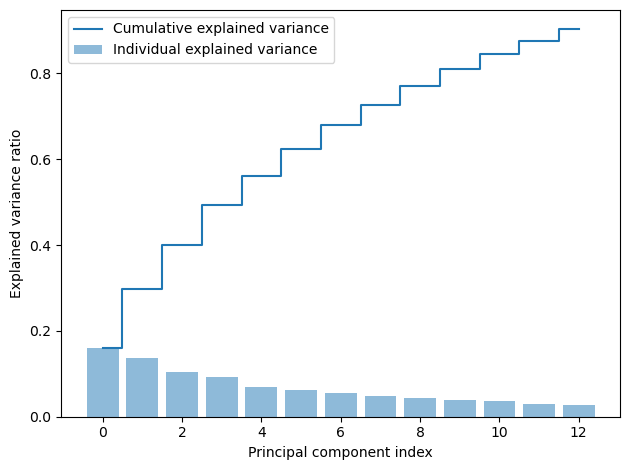

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np 

pca = PCA(n_components=13)

#
X_train_pca = pca.fit_transform(X_Numerical_sc)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
X_train_pca.shape
columns_pca = [f"C{idx}" for idx in range(13) ]
X_PCA = pd.DataFrame(X_train_pca,columns=columns_pca)


In [16]:
cum_sum_eigenvalues

array([0.16078899, 0.2974473 , 0.40126482, 0.49288873, 0.56110905,
       0.62364608, 0.67973374, 0.72738141, 0.77131438, 0.81017905,
       0.84602711, 0.87632616, 0.90253629])

# Optimize the features

### L4_SRC_PORT & L4_DST_PORT

Ports with numbers 0–1023 are called system or well-known ports; ports with numbers 1024-49151 are called user or registered ports, and ports with numbers 49152-65535 are called dynamic, private or ephemeral ports.[2] Both system and user ports are used by transport protocols (TCP, UDP, DCCP, SCTP) to identify an application or service.

In [177]:
well_known_port = list(range(1024))
registered_ports = list(range(1024,49152))
ephemeral_ports = list(range(49152,65535))

In [178]:
X_cat =  ton_iot_copy[categorical_feature]


In [179]:
X_cat['L4_SRC_PORT_C'] = 'Others'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_SRC_PORT'],inplace=True)

X_cat['L4_SRC_PORT_C'].value_counts()

print(X_cat.shape)

(37763497, 10)


In [180]:
X_cat['L4_DST_PORT_C'] = 'Others'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_DST_PORT'],inplace=True)
X_cat['L4_DST_PORT_C'].value_counts()


well_known_port     36216410
registered_ports     1229256
ephemeral_ports       317386
Others                   445
Name: L4_DST_PORT_C, dtype: int64

#### Removerd features are :

to_drop_zero = ['RETRANSMITTED_IN_BYTES','RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES','FTP_COMMAND_RET_CODE','ICMP_TYPE','DNS_TTL_ANSWER']
&&

['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS', 'ICMP_IPV4_TYPE']

## DNS

In [181]:
X_cat['DNS_QUERY_TYPE'] = X_cat['DNS_QUERY_TYPE'].astype('O')
list_proto = [0]
X_cat['DNS_QUERY_TYPE'][~X_cat['DNS_QUERY_TYPE'].isin(list_proto)] = 1
X_cat['DNS_QUERY_TYPE'].value_counts()

0    37756539
1        6958
Name: DNS_QUERY_TYPE, dtype: int64

### PROTOCOL

In [182]:
X_cat['PROTOCOL'] = X_cat['PROTOCOL'].astype(int)

X_cat['PROTOCOL'].value_counts()

6     19411243
17    18349697
1         2551
2            4
58           2
Name: PROTOCOL, dtype: int64

In [183]:
print(X_cat.shape)

(37763497, 10)


In [184]:
X_cat['PROTOCOL'].value_counts()

6     19411243
17    18349697
1         2551
2            4
58           2
Name: PROTOCOL, dtype: int64

### L7_PROTO

In [185]:
X_cat['L7_PROTO'] = X_cat['L7_PROTO'].astype('O')
list_proto = [0,7,118]
X_cat['L7_PROTO'][~X_cat['L7_PROTO'].isin(list_proto)] = 'Other'
X_cat['L7_PROTO'].value_counts()

Other    18384705
7.0      17793435
0.0       1585357
Name: L7_PROTO, dtype: int64

#### Adresses

### Adress Range

In [186]:
# Private adresses
# Class A: 10.0.0.0 to 10.255.255.255
# Class B: 172.16.0.0 to 172.31.255.255
# Class C: 192.168.0.0 to 192.168.255.255
from ipaddress import ip_address


def findIPs(start, end):
    start = ip_address(start)
    end = ip_address(end)
    result = []
    while start <= end:
        result.append(str(start))
        start += 1
    return result
print('classe_a process ------------------------------->')
plage_classe_a=findIPs('10.0.0.0', '10.255.255.255')
print('classe_b process ------------------------------->')
plage_classe_b=findIPs('172.16.0.0', '172.31.255.255')
print('classe_c process ------------------------------->')
plage_classe_c=findIPs('192.168.0.0', '192.168.255.255')

classe_a process ------------------------------->
classe_b process ------------------------------->
classe_c process ------------------------------->


In [187]:
import numpy as np
X_cat['IPV4_DST_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_DST_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


classe_c        37759084
public/other        4413
Name: IPV4_DST_ADDR_CLASSE, dtype: int64

In [188]:
import numpy as np
X_cat['IPV4_SRC_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_SRC_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


classe_c        37763472
public/other          25
Name: IPV4_SRC_ADDR_CLASSE, dtype: int64

Remove IPV4_SRC_ADDR & IPV4_DST_ADDR and Keep IPV4_SRC_ADDR IPV4_DST_ADDR

In [189]:
X_cat.drop(columns=['IPV4_SRC_ADDR','IPV4_DST_ADDR'], inplace=True)

## Optimze the 3 features ICMP_TYPE, ICMP_IPV4_TYPE, DNS_TTL_ANSWER

In [190]:
import math
infini = math.inf

X_cat['ICMP_TYPE'] = X_cat['ICMP_TYPE'].astype('O')
X_cat['ICMP_IPV4_TYPE'] = X_cat['ICMP_IPV4_TYPE'].astype('O')
X_cat['DNS_TTL_ANSWER'] = X_cat['DNS_TTL_ANSWER'].astype('O')

X_cat['ICMP_TYPE'][~(X_cat['ICMP_TYPE']==0)]=1
X_cat['ICMP_IPV4_TYPE'][~(X_cat['ICMP_IPV4_TYPE']==0)]=1
X_cat['DNS_TTL_ANSWER'][~(X_cat['DNS_TTL_ANSWER']==0)]=1

print(f"ICMPTYPE {X_cat['ICMP_TYPE'].value_counts()}, \n ICMP_IPV4_TYPE  {X_cat['ICMP_IPV4_TYPE'].value_counts()}, \n  DNS_TTL_ANSWER  {X_cat['DNS_TTL_ANSWER'].value_counts()}")



ICMPTYPE 0    32830438
1     4933059
Name: ICMP_TYPE, dtype: int64, 
 ICMP_IPV4_TYPE  0    32830517
1     4932980
Name: ICMP_IPV4_TYPE, dtype: int64, 
  DNS_TTL_ANSWER  0    37760796
1        2701
Name: DNS_TTL_ANSWER, dtype: int64


In [191]:
X_cat.head(4)

,PROTOCOL,L7_PROTO,DNS_QUERY_TYPE,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_TTL_ANSWER,L4_SRC_PORT_C,L4_DST_PORT_C,IPV4_DST_ADDR_CLASSE,IPV4_SRC_ADDR_CLASSE
0,6,7.0,0,0,0,0,ephemeral_ports,well_known_port,classe_c,classe_c
1,6,7.0,0,0,0,0,ephemeral_ports,well_known_port,classe_c,classe_c
2,6,7.0,0,0,0,0,registered_ports,well_known_port,classe_c,classe_c
3,17,Other,0,0,0,0,ephemeral_ports,well_known_port,classe_c,classe_c


# Feature Selection Filter-based

In [192]:
from sklearn.feature_selection import chi2

# Convert string values in categorical features to numerical
X_cat = X_cat.replace('Other',999)
X_cat = X_cat.replace('Others',999)
X_cat = X_cat.replace('well_known_port',0)
X_cat = X_cat.replace('registered_ports',1)
X_cat = X_cat.replace('ephemeral_ports',2)



X_cat = X_cat.replace('localhost',0)
X_cat = X_cat.replace('classe_a',1)
X_cat = X_cat.replace('classe_b',2)
X_cat = X_cat.replace('classe_c',3)
X_cat = X_cat.replace('public/other',4)


X_cat = X_cat.astype(int)



#X.dropna(inplace=True)

#X = X.astype(int)



In [193]:
chi2_corr = chi2(X_cat,y_b)

columns_ranked_chi2 = list(X_cat.columns[np.argsort(-chi2_corr[0])])
columns_ranked_chi2

['L7_PROTO',
 'L4_DST_PORT_C',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L4_SRC_PORT_C',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

## Ranking of features using CHI2

# We will select 3 pourcentage from the rest of the features
categorical
- 8.0
- 5.0
- 2.0

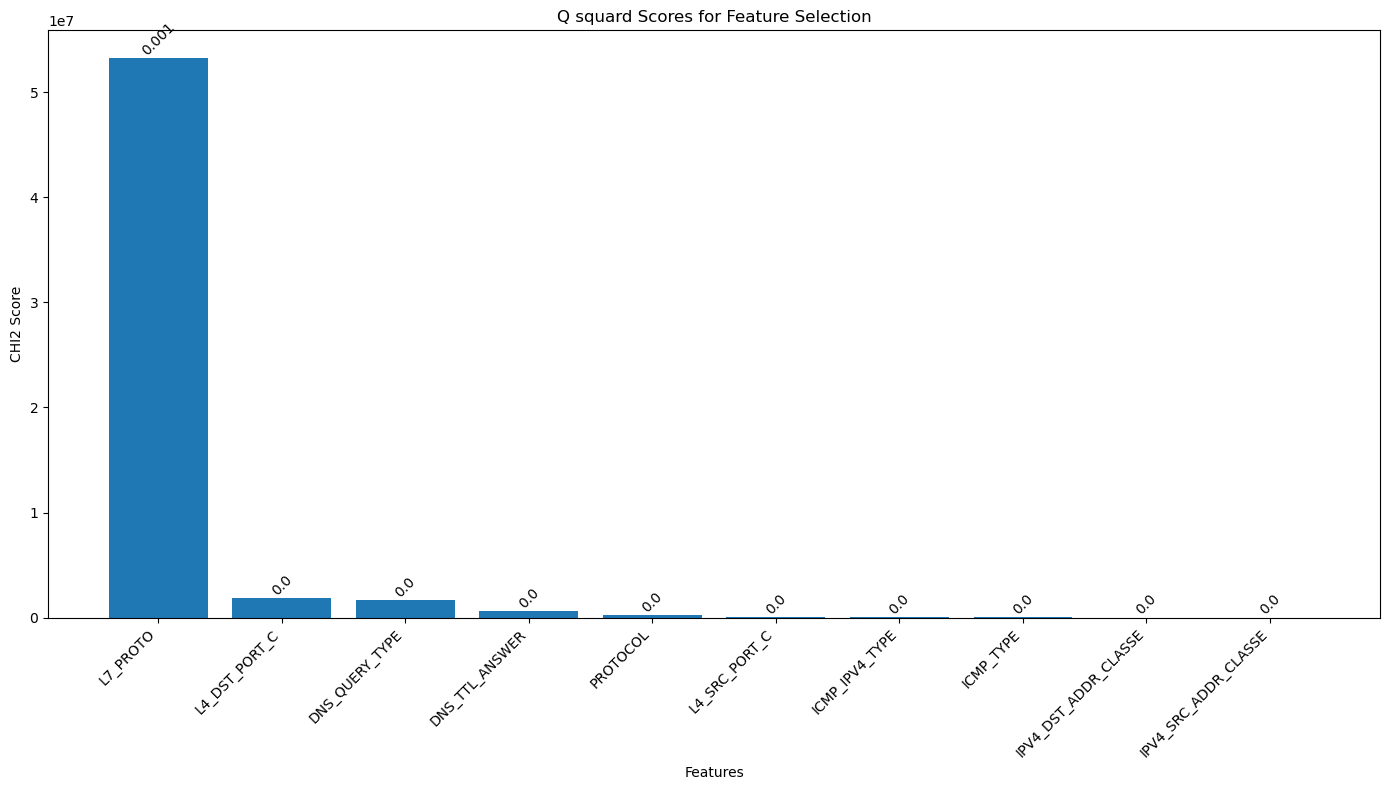

In [204]:
import matplotlib.pyplot as plt

chi2_scores = -np.sort(-chi2_corr[0])
feature_names_chi2 = columns_ranked_chi2

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(feature_names_chi2)), chi2_scores, align='center')
plt.xticks(range(len(feature_names_chi2)), feature_names_chi2, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("CHI2 Score")
plt.title("Q squard Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

### Generate the 3 databases for chi 2

In [194]:
X_chi2_20 = X_cat[columns_ranked_chi2[:2]]
X_chi2_50 =  X_cat[columns_ranked_chi2[:5]]
X_chi2_80 =  X_cat[columns_ranked_chi2[:8]]

dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
list_dummy_20 = list(set( list(X_chi2_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_chi2_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_chi2_80.columns)).intersection(dummy_feature))


X_chi2_20 = pd.get_dummies(X_chi2_20, columns=list_dummy_20)
X_chi2_50 = pd.get_dummies(X_chi2_50, columns=list_dummy_50)
X_chi2_80 = pd.get_dummies(X_chi2_80, columns=list_dummy_80)

# MUTUAL INFORMATION

In [195]:
from sklearn.feature_selection import mutual_info_classif

mi_class = mutual_info_classif(X_cat, y_b)


In [196]:
columns_ranked_mi = list(X_cat.columns[np.argsort(-mi_class)])
columns_ranked_mi

['DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L7_PROTO',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [197]:
X_MI_20 = X_cat[columns_ranked_mi[:2]]
X_MI_50 =  X_cat[columns_ranked_mi[:5]]
X_MI_80 =  X_cat[columns_ranked_mi[:8]]

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

## mRMR

In [198]:
from mrmr import mrmr_classif
selected_features_20 = mrmr_classif(X=X_cat, y=y_b, K=2)
selected_features_50 = mrmr_classif(X=X_cat, y=y_b, K=5)
selected_features_80 = mrmr_classif(X=X_cat, y=y_b, K=8)

100%|████████████████████████████████████████████| 8/8 [00:37<00:00,  4.70s/it]


In [199]:
X_mrmr_80 = X_cat[selected_features_80]
X_mrmr_50 = X_cat[selected_features_50]
X_mrmr_20 = X_cat[selected_features_20]

list_dummy_20 = list(set( list(X_mrmr_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_mrmr_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_mrmr_80.columns)).intersection(dummy_feature))

X_mrmr_20 = pd.get_dummies(X_mrmr_20, columns=list_dummy_20)
X_mrmr_50 = pd.get_dummies(X_mrmr_50, columns=list_dummy_50)
X_mrmr_80 = pd.get_dummies(X_mrmr_80, columns=list_dummy_80)

In [201]:
selected_features_80

['DNS_QUERY_TYPE',
 'L7_PROTO',
 'IPV4_DST_ADDR_CLASSE',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'ICMP_IPV4_TYPE']

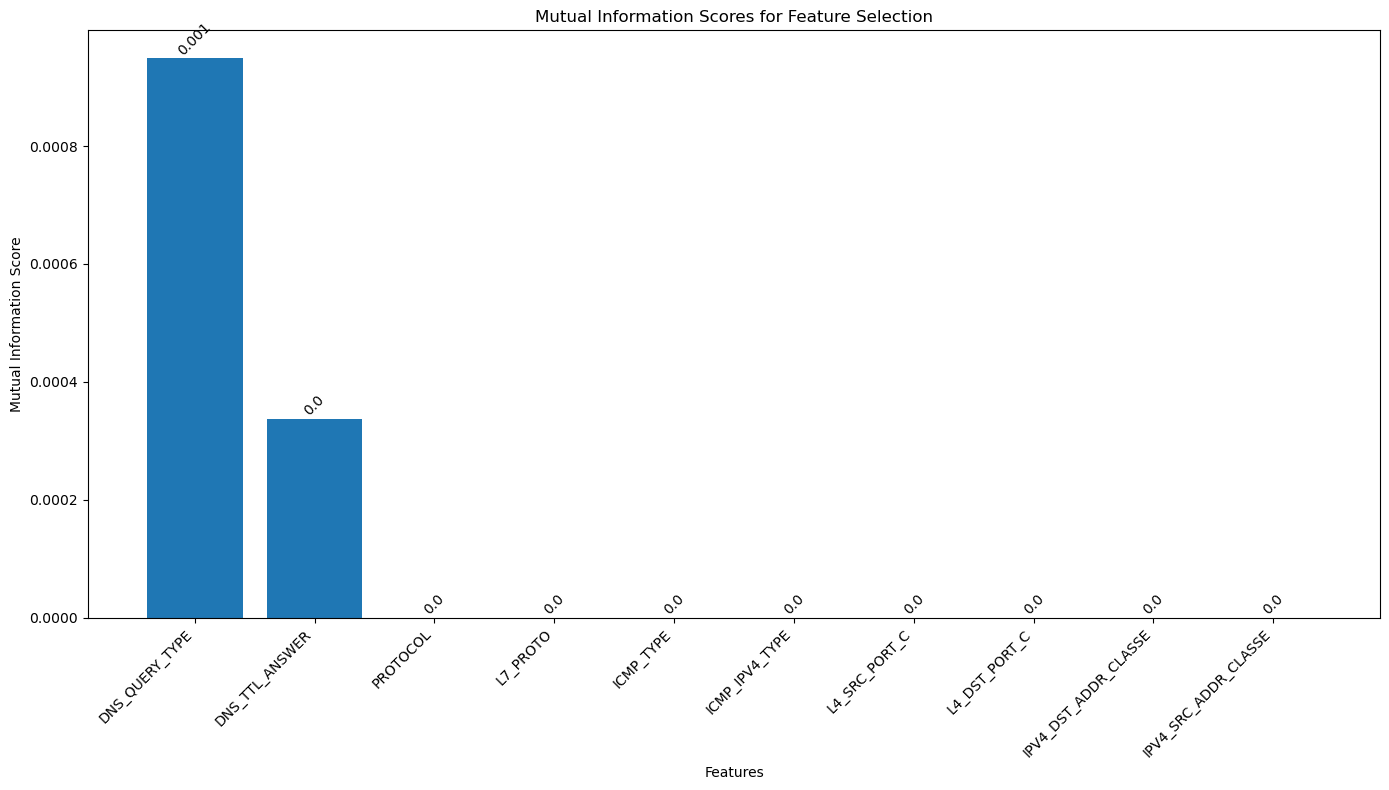

In [203]:
import matplotlib.pyplot as plt

mi_scores = -np.sort(-mi_class)
feature_names = columns_ranked_mi

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(feature_names)), mi_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

In [202]:
import pickle

class Company(object):
    def __init__(self, name, value):
        self.name = name
        self.value = value

with open('attribute/bot_num.pkl', 'wb') as outp:
    company1 = Company('mi_class', mi_class)
    pickle.dump(company1, outp, pickle.HIGHEST_PROTOCOL)

    company2 = Company('selected_features_80', selected_features_80)
    pickle.dump(company2, outp, pickle.HIGHEST_PROTOCOL)
    
    company3 = Company('chi2_corr', chi2_corr)
    pickle.dump(company3, outp, pickle.HIGHEST_PROTOCOL)
    
    company4 = Company('sorted_kendall_tau_scores', sorted_kendall_tau_scores)
    pickle.dump(company4, outp, pickle.HIGHEST_PROTOCOL)
    
    company5 = Company('sb_anova', sb)
    pickle.dump(company5, outp, pickle.HIGHEST_PROTOCOL)



"""with open('company_data.pkl', 'rb') as inp:
    company1 = pickle.load(inp)
    print(company1.name)  # -> banana
    print(company1.value)  # -> 40

    company2 = pickle.load(inp)
    print(company2.name) # -> spam
    print(company2.value)  # -> 42"""

"with open('company_data.pkl', 'rb') as inp:\n    company1 = pickle.load(inp)\n    print(company1.name)  # -> banana\n    print(company1.value)  # -> 40\n\n    company2 = pickle.load(inp)\n    print(company2.name) # -> spam\n    print(company2.value)  # -> 42"

### Decision Tree

### MI

In [48]:
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [49]:
from sklearn import tree
from sklearn.model_selection import KFold
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,cohen_kappa_score,matthews_corrcoef


def my_grid_result_df(clf,hyperparams,data_name,algo_name,X,y):
    
    scoring = {"Accuracy": "accuracy", "F1-Score":'f1' ,"Recall": 'recall',
               "Precision":"precision","MCC":make_scorer(matthews_corrcoef), "Kappa":make_scorer(cohen_kappa_score)}
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    search = GridSearchCV(clf, hyperparams, scoring=scoring, n_jobs=-1, cv=cv_inner, refit="MCC")
    grid_result = search.fit(X, y)

    json_dump = json.dumps(grid_result.cv_results_,cls=NumpyEncoder)
    # Serializing json

    # Writing to sample.json
    with open(f"./result_bot_num_bin/{algo_name}__{data_name}.json", "w") as outfile:
        outfile.write(json_dump)


In [50]:
X_A_20.shape

(37763497, 5)

In [51]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_20.shape

(37763497, 12)

In [52]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_50 = pd.concat([X_A_50,X_chi2_50],axis=1)
X_A_chi2_80 = pd.concat([X_A_80,X_chi2_80],axis=1)

X_A_MI_20 = pd.concat([X_A_20,X_MI_20],axis=1)
X_A_MI_50= pd.concat([X_A_50,X_MI_50],axis=1)
X_A_MI_80= pd.concat([X_A_80,X_MI_80],axis=1)

X_A_mRMR_20 = pd.concat([X_A_20,X_mrmr_20],axis=1)
X_A_mRMR_50 = pd.concat([X_A_50,X_mrmr_50],axis=1)
X_A_mRMR_80 = pd.concat([X_A_80,X_mrmr_80],axis=1)

X_K_chi2_20 = pd.concat([X_K_20,X_chi2_20],axis=1)
X_K_chi2_50 = pd.concat([X_K_50,X_chi2_50],axis=1)
X_K_chi2_80 = pd.concat([X_K_80,X_chi2_80],axis=1)

X_K_MI_20 = pd.concat([X_K_20,X_MI_20],axis=1)
X_K_MI_50 = pd.concat([X_K_50,X_MI_50],axis=1)
X_K_MI_80 = pd.concat([X_K_80,X_MI_80],axis=1)

X_K_mRMR_20 = pd.concat([X_K_20,X_mrmr_20],axis=1)
X_K_mRMR_50 = pd.concat([X_K_50,X_mrmr_50],axis=1)
X_K_mRMR_80 = pd.concat([X_K_80,X_mrmr_80],axis=1)

X_PCA_chi2  = pd.concat([X_PCA,X_chi2_80],axis=1)
X_PCA_MI = pd.concat([X_PCA,X_MI_80],axis=1)
X_PCA_mRMR = pd.concat([X_PCA,X_mrmr_80],axis=1)

In [53]:
print(X_A_chi2_20.shape)
print(X_A_chi2_50.shape)
print(X_A_chi2_80.shape)
print(X_A_MI_20.shape)
print(X_A_MI_50.shape)
print(X_A_MI_80.shape)
print(X_A_mRMR_20.shape)
print(X_A_mRMR_50.shape)
print(X_A_mRMR_80.shape)
print(X_K_chi2_20.shape)
print(X_K_chi2_50.shape)
print(X_K_chi2_80.shape)
print(X_K_MI_20.shape)
print(X_K_MI_50.shape)
print(X_K_MI_80.shape)
print(X_K_mRMR_20.shape)
print(X_K_mRMR_50.shape)
print(X_K_mRMR_80.shape)
print(X_PCA_chi2.shape)
print(X_PCA_MI.shape)
print(X_PCA_mRMR.shape)

(37763497, 12)
(37763497, 27)
(37763497, 40)
(37763497, 7)
(37763497, 28)
(37763497, 40)
(37763497, 9)
(37763497, 27)
(37763497, 41)
(37763497, 12)
(37763497, 27)
(37763497, 40)
(37763497, 7)
(37763497, 28)
(37763497, 40)
(37763497, 9)
(37763497, 27)
(37763497, 41)
(37763497, 33)
(37763497, 33)
(37763497, 34)


In [54]:


dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
X_cat_dm = pd.get_dummies(X_cat, columns=dummy_feature)
X =  pd.concat([X_Numerical_sc,X_cat_dm],axis=1)
X.shape

(37763497, 45)

In [55]:
datasets = {"X_A_chi2_20":X_A_chi2_20,
"X_A_chi2_50":X_A_chi2_50,
"X_A_chi2_80":X_A_chi2_80,
"X_A_MI_20":X_A_MI_20,
"X_A_MI_50":X_A_MI_50,
"X_A_MI_80":X_A_MI_80,
"X_A_mRMR_20":X_A_mRMR_20,
"X_A_mRMR_50":X_A_mRMR_50,
"X_A_mRMR_80":X_A_mRMR_80,
"X_K_chi2_20":X_K_chi2_20,
"X_K_chi2_50":X_K_chi2_50,
"X_K_chi2_80":X_K_chi2_80,
"X_K_MI_20":X_K_MI_20,
"X_K_MI_50":X_K_MI_50,
"X_K_MI_80":X_K_MI_80,
"X_K_mRMR_20":X_K_mRMR_20,
"X_K_mRMR_50":X_K_mRMR_50,
"X_K_mRMR_80":X_K_mRMR_80,
"X_PCA_chi2":X_PCA_chi2,
"X_PCA_MI":X_PCA_MI,
"X_PCA_mRMR":X_PCA_mRMR,
           "X":X}

In [56]:
import datetime
def create_all_result(clf,algo_name,hyperparams,datasets,y):
    for k,v in datasets.items():
        now = datetime.datetime.now()
        print(f'======== process======= dataset : {k} \t time is {now}')
        my_grid_result_df(clf,hyperparams,k,algo_name,v,y)
        now = datetime.datetime.now()
        print(f'======== Done  ======== dataset : {k} \t time is {now}')
        print('\n')


# Decision Tree

In [57]:
clf = tree.DecisionTreeClassifier()
hyperparams = {}
create_all_result(clf,'DecisionTreeClassifier',hyperparams,datasets,y_b)

======== process======= dataset : X_A_chi2_20 	 time is 2023-04-07 19:23:13.252162
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-04-07 19:26:41.456705


======== process======= dataset : X_A_chi2_50 	 time is 2023-04-07 19:26:41.456705
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-04-07 19:53:27.587754


======== process======= dataset : X_A_chi2_80 	 time is 2023-04-07 19:53:27.587754
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-04-07 20:43:09.568405


======== process======= dataset : X_A_MI_20 	 time is 2023-04-07 20:43:09.568405
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-07 20:45:52.612822


======== process======= dataset : X_A_MI_50 	 time is 2023-04-07 20:45:52.612822
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-07 21:17:16.357274


======== process======= dataset : X_A_MI_80 	 time is 2023-04-07 21:17:16.357274
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-04-07 22:15:22.431755


====

In [58]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

### AdaBoostClassifier, GradientBoostingClassifier


In [59]:
def print_skip():
    print('\n')
    print('*************** \t ******************* \t ****************')
    print('*************** \t ******************* \t ****************')
    print('\n')

In [62]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from xgboost import  XGBClassifier


clf = GradientBoostingClassifier(random_state=0)
hyperparams = {'n_estimators':[50, 100, 150,200]}

print('======================= GradientBoostingClassifier =====================')
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets,y_b)
print_skip()


print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets,y_b)


print_skip()

print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets,y_b)


======================= GradientBoostingClassifier =====================
======== process======= dataset : X_A_chi2_20 	 time is 2023-04-08 13:53:03.559603
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-04-08 16:13:59.320284


======== process======= dataset : X_A_chi2_50 	 time is 2023-04-08 16:13:59.320284
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-04-09 05:46:01.322404


======== process======= dataset : X_A_chi2_80 	 time is 2023-04-09 05:46:01.322404
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-04-09 19:48:14.612046


======== process======= dataset : X_A_MI_20 	 time is 2023-04-09 19:48:14.613047
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-09 21:42:27.488749


======== process======= dataset : X_A_MI_50 	 time is 2023-04-09 21:42:27.488749
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-10 06:14:46.681602


======== process======= dataset : X_A_MI_80 	 time is 2023-04-10 06:14:46.681602
======== Done 

======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-25 07:18:49.631090


======== process======= dataset : X_A_MI_50 	 time is 2023-04-25 07:18:49.646716
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-25 10:44:44.773873


======== process======= dataset : X_A_MI_80 	 time is 2023-04-25 10:44:44.773873
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-04-25 15:22:08.098352


======== process======= dataset : X_A_mRMR_20 	 time is 2023-04-25 15:22:08.160859
======== Done  ======== dataset : X_A_mRMR_20 	 time is 2023-04-25 16:53:08.219361


======== process======= dataset : X_A_mRMR_50 	 time is 2023-04-25 16:53:08.219361
======== Done  ======== dataset : X_A_mRMR_50 	 time is 2023-04-25 20:14:07.008975


======== process======= dataset : X_A_mRMR_80 	 time is 2023-04-25 20:14:07.008975
======== Done  ======== dataset : X_A_mRMR_80 	 time is 2023-04-26 00:57:48.139566


======== process======= dataset : X_K_chi2_20 	 time is 2023-04-26 00:57:48.389595
==

21:	learn: 0.0011770	total: 29.5s	remaining: 2m 51s
22:	learn: 0.0011653	total: 30.7s	remaining: 2m 49s
23:	learn: 0.0011605	total: 31.9s	remaining: 2m 47s
24:	learn: 0.0011420	total: 33.2s	remaining: 2m 45s
25:	learn: 0.0011187	total: 34.4s	remaining: 2m 43s
26:	learn: 0.0011069	total: 35.5s	remaining: 2m 41s
27:	learn: 0.0011034	total: 36.7s	remaining: 2m 39s
28:	learn: 0.0010973	total: 38s	remaining: 2m 38s
29:	learn: 0.0010915	total: 39.2s	remaining: 2m 36s
30:	learn: 0.0010853	total: 40.4s	remaining: 2m 34s
31:	learn: 0.0010821	total: 41.6s	remaining: 2m 33s
32:	learn: 0.0010774	total: 42.8s	remaining: 2m 31s
33:	learn: 0.0010775	total: 44s	remaining: 2m 29s
34:	learn: 0.0010751	total: 45.1s	remaining: 2m 28s
35:	learn: 0.0010693	total: 46.3s	remaining: 2m 26s
36:	learn: 0.0010671	total: 47.6s	remaining: 2m 25s
37:	learn: 0.0010646	total: 48.8s	remaining: 2m 23s
38:	learn: 0.0010622	total: 50s	remaining: 2m 22s
39:	learn: 0.0010525	total: 51.2s	remaining: 2m 20s
40:	learn: 0.00098

25:	learn: 0.0011601	total: 41.8s	remaining: 38.5s
26:	learn: 0.0011601	total: 43.2s	remaining: 36.8s
27:	learn: 0.0011601	total: 44.6s	remaining: 35.1s
28:	learn: 0.0011601	total: 46.1s	remaining: 33.4s
29:	learn: 0.0011601	total: 47.5s	remaining: 31.7s
30:	learn: 0.0011601	total: 48.9s	remaining: 30s
31:	learn: 0.0011352	total: 50.4s	remaining: 28.3s
32:	learn: 0.0011352	total: 51.8s	remaining: 26.7s
33:	learn: 0.0011352	total: 53.2s	remaining: 25s
34:	learn: 0.0011352	total: 54.6s	remaining: 23.4s
35:	learn: 0.0011352	total: 56.1s	remaining: 21.8s
36:	learn: 0.0011352	total: 57.5s	remaining: 20.2s
37:	learn: 0.0011352	total: 58.9s	remaining: 18.6s
38:	learn: 0.0011352	total: 1m	remaining: 17s
39:	learn: 0.0011352	total: 1m 1s	remaining: 15.5s
40:	learn: 0.0011352	total: 1m 3s	remaining: 13.9s
41:	learn: 0.0011352	total: 1m 4s	remaining: 12.3s
42:	learn: 0.0011352	total: 1m 6s	remaining: 10.8s
43:	learn: 0.0011352	total: 1m 7s	remaining: 9.21s
44:	learn: 0.0011352	total: 1m 8s	remain

78:	learn: 0.0053268	total: 1m 45s	remaining: 1m 34s
79:	learn: 0.0053147	total: 1m 47s	remaining: 1m 33s
80:	learn: 0.0052777	total: 1m 48s	remaining: 1m 32s
81:	learn: 0.0052712	total: 1m 49s	remaining: 1m 30s
82:	learn: 0.0053295	total: 1m 50s	remaining: 1m 29s
83:	learn: 0.0053256	total: 1m 51s	remaining: 1m 27s
84:	learn: 0.0056530	total: 1m 53s	remaining: 1m 26s
85:	learn: 0.0065139	total: 1m 54s	remaining: 1m 25s
86:	learn: 0.0056084	total: 1m 55s	remaining: 1m 23s
87:	learn: 0.0061655	total: 1m 57s	remaining: 1m 22s
88:	learn: 0.0044092	total: 1m 58s	remaining: 1m 21s
89:	learn: 0.0055207	total: 1m 59s	remaining: 1m 19s
90:	learn: 0.0028775	total: 2m 1s	remaining: 1m 18s
91:	learn: 0.0062288	total: 2m 2s	remaining: 1m 17s
92:	learn: 0.0053994	total: 2m 3s	remaining: 1m 15s
93:	learn: 0.0061397	total: 2m 5s	remaining: 1m 14s
94:	learn: 0.0053411	total: 2m 6s	remaining: 1m 13s
95:	learn: 0.0056160	total: 2m 7s	remaining: 1m 11s
96:	learn: 0.0036931	total: 2m 8s	remaining: 1m 10s


29:	learn: 0.0009018	total: 57.6s	remaining: 38.4s
30:	learn: 0.0009017	total: 59.1s	remaining: 36.2s
31:	learn: 0.0009017	total: 1m	remaining: 34s
32:	learn: 0.0009017	total: 1m 1s	remaining: 31.9s
33:	learn: 0.0009017	total: 1m 3s	remaining: 29.8s
34:	learn: 0.0009017	total: 1m 4s	remaining: 27.7s
35:	learn: 0.0009017	total: 1m 6s	remaining: 25.7s
36:	learn: 0.0009017	total: 1m 7s	remaining: 23.7s
37:	learn: 0.0009017	total: 1m 8s	remaining: 21.7s
38:	learn: 0.0009017	total: 1m 10s	remaining: 19.8s
39:	learn: 0.0009017	total: 1m 11s	remaining: 17.9s
40:	learn: 0.0009017	total: 1m 13s	remaining: 16s
41:	learn: 0.0009017	total: 1m 14s	remaining: 14.2s
42:	learn: 0.0009017	total: 1m 15s	remaining: 12.3s
43:	learn: 0.0009017	total: 1m 17s	remaining: 10.5s
44:	learn: 0.0009017	total: 1m 18s	remaining: 8.73s
45:	learn: 0.0009017	total: 1m 19s	remaining: 6.95s
46:	learn: 0.0009017	total: 1m 21s	remaining: 5.2s
47:	learn: 0.0009017	total: 1m 22s	remaining: 3.45s
48:	learn: 0.0009017	total: 1

133:	learn: 0.0011002	total: 2m 42s	remaining: 19.4s
134:	learn: 0.0010997	total: 2m 44s	remaining: 18.2s
135:	learn: 0.0010991	total: 2m 45s	remaining: 17s
136:	learn: 0.0011004	total: 2m 46s	remaining: 15.8s
137:	learn: 0.0010962	total: 2m 47s	remaining: 14.6s
138:	learn: 0.0010960	total: 2m 49s	remaining: 13.4s
139:	learn: 0.0010957	total: 2m 50s	remaining: 12.2s
140:	learn: 0.0010980	total: 2m 51s	remaining: 10.9s
141:	learn: 0.0010947	total: 2m 52s	remaining: 9.72s
142:	learn: 0.0010951	total: 2m 53s	remaining: 8.5s
143:	learn: 0.0010943	total: 2m 54s	remaining: 7.29s
144:	learn: 0.0010939	total: 2m 55s	remaining: 6.07s
145:	learn: 0.0010934	total: 2m 57s	remaining: 4.86s
146:	learn: 0.0010965	total: 2m 58s	remaining: 3.64s
147:	learn: 0.0010954	total: 2m 59s	remaining: 2.43s
148:	learn: 0.0010920	total: 3m	remaining: 1.21s
149:	learn: 0.0010912	total: 3m 1s	remaining: 0us
======== Done  ======== dataset : X_A_mRMR_20 	 time is 2023-04-28 11:45:50.412089


======== process======= 

85:	learn: 0.0007307	total: 2m 20s	remaining: 1m 44s
86:	learn: 0.0007307	total: 2m 22s	remaining: 1m 42s
87:	learn: 0.0007307	total: 2m 23s	remaining: 1m 41s
88:	learn: 0.0007307	total: 2m 24s	remaining: 1m 39s
89:	learn: 0.0007307	total: 2m 26s	remaining: 1m 37s
90:	learn: 0.0007307	total: 2m 28s	remaining: 1m 35s
91:	learn: 0.0007307	total: 2m 29s	remaining: 1m 34s
92:	learn: 0.0007307	total: 2m 30s	remaining: 1m 32s
93:	learn: 0.0007307	total: 2m 32s	remaining: 1m 30s
94:	learn: 0.0007307	total: 2m 33s	remaining: 1m 29s
95:	learn: 0.0007307	total: 2m 35s	remaining: 1m 27s
96:	learn: 0.0007307	total: 2m 37s	remaining: 1m 25s
97:	learn: 0.0007307	total: 2m 38s	remaining: 1m 24s
98:	learn: 0.0007307	total: 2m 40s	remaining: 1m 22s
99:	learn: 0.0007307	total: 2m 41s	remaining: 1m 20s
100:	learn: 0.0007307	total: 2m 43s	remaining: 1m 19s
101:	learn: 0.0007307	total: 2m 44s	remaining: 1m 17s
102:	learn: 0.0007307	total: 2m 46s	remaining: 1m 15s
103:	learn: 0.0007307	total: 2m 47s	remaini

88:	learn: 0.0044928	total: 2m 7s	remaining: 1m 27s
89:	learn: 0.0044916	total: 2m 8s	remaining: 1m 25s
90:	learn: 0.0044913	total: 2m 9s	remaining: 1m 24s
91:	learn: 0.0044922	total: 2m 10s	remaining: 1m 22s
92:	learn: 0.0044919	total: 2m 11s	remaining: 1m 20s
93:	learn: 0.0044905	total: 2m 13s	remaining: 1m 19s
94:	learn: 0.0044891	total: 2m 14s	remaining: 1m 17s
95:	learn: 0.0044888	total: 2m 15s	remaining: 1m 16s
96:	learn: 0.0044884	total: 2m 16s	remaining: 1m 14s
97:	learn: 0.0044871	total: 2m 17s	remaining: 1m 12s
98:	learn: 0.0044881	total: 2m 18s	remaining: 1m 11s
99:	learn: 0.0044863	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0044852	total: 2m 20s	remaining: 1m 8s
101:	learn: 0.0044849	total: 2m 22s	remaining: 1m 6s
102:	learn: 0.0044838	total: 2m 23s	remaining: 1m 5s
103:	learn: 0.0044828	total: 2m 24s	remaining: 1m 3s
104:	learn: 0.0044804	total: 2m 25s	remaining: 1m 2s
105:	learn: 0.0044782	total: 2m 26s	remaining: 1m
106:	learn: 0.0044772	total: 2m 27s	remaining: 59.4s


92:	learn: 0.0009415	total: 2m 10s	remaining: 1m 19s
93:	learn: 0.0009415	total: 2m 11s	remaining: 1m 18s
94:	learn: 0.0009415	total: 2m 13s	remaining: 1m 17s
95:	learn: 0.0009415	total: 2m 14s	remaining: 1m 15s
96:	learn: 0.0009415	total: 2m 15s	remaining: 1m 14s
97:	learn: 0.0009415	total: 2m 17s	remaining: 1m 12s
98:	learn: 0.0009415	total: 2m 18s	remaining: 1m 11s
99:	learn: 0.0009415	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0009415	total: 2m 21s	remaining: 1m 8s
101:	learn: 0.0009415	total: 2m 22s	remaining: 1m 7s
102:	learn: 0.0009415	total: 2m 23s	remaining: 1m 5s
103:	learn: 0.0009415	total: 2m 25s	remaining: 1m 4s
104:	learn: 0.0009415	total: 2m 26s	remaining: 1m 2s
105:	learn: 0.0009415	total: 2m 28s	remaining: 1m 1s
106:	learn: 0.0009415	total: 2m 29s	remaining: 1m
107:	learn: 0.0009415	total: 2m 30s	remaining: 58.6s
108:	learn: 0.0009415	total: 2m 32s	remaining: 57.2s
109:	learn: 0.0009415	total: 2m 33s	remaining: 55.8s
110:	learn: 0.0009415	total: 2m 34s	remaining: 54.

96:	learn: 0.0006972	total: 2m 30s	remaining: 1m 22s
97:	learn: 0.0006972	total: 2m 31s	remaining: 1m 20s
98:	learn: 0.0006972	total: 2m 33s	remaining: 1m 18s
99:	learn: 0.0006972	total: 2m 34s	remaining: 1m 17s
100:	learn: 0.0006972	total: 2m 36s	remaining: 1m 15s
101:	learn: 0.0006972	total: 2m 37s	remaining: 1m 14s
102:	learn: 0.0006972	total: 2m 39s	remaining: 1m 12s
103:	learn: 0.0006972	total: 2m 40s	remaining: 1m 11s
104:	learn: 0.0006972	total: 2m 42s	remaining: 1m 9s
105:	learn: 0.0006972	total: 2m 43s	remaining: 1m 7s
106:	learn: 0.0006972	total: 2m 44s	remaining: 1m 6s
107:	learn: 0.0006972	total: 2m 46s	remaining: 1m 4s
108:	learn: 0.0006972	total: 2m 47s	remaining: 1m 3s
109:	learn: 0.0006972	total: 2m 49s	remaining: 1m 1s
110:	learn: 0.0006972	total: 2m 50s	remaining: 1m
111:	learn: 0.0006972	total: 2m 52s	remaining: 58.4s
112:	learn: 0.0006972	total: 2m 53s	remaining: 56.9s
113:	learn: 0.0006972	total: 2m 55s	remaining: 55.3s
114:	learn: 0.0006972	total: 2m 56s	remaining

99:	learn: 0.0092031	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0092021	total: 2m 20s	remaining: 1m 8s
101:	learn: 0.0092019	total: 2m 21s	remaining: 1m 6s
102:	learn: 0.0092007	total: 2m 22s	remaining: 1m 5s
103:	learn: 0.0092009	total: 2m 24s	remaining: 1m 3s
104:	learn: 0.0091999	total: 2m 25s	remaining: 1m 2s
105:	learn: 0.0091989	total: 2m 26s	remaining: 1m
106:	learn: 0.0091988	total: 2m 27s	remaining: 59.3s
107:	learn: 0.0091994	total: 2m 28s	remaining: 57.8s
108:	learn: 0.0091986	total: 2m 29s	remaining: 56.3s
109:	learn: 0.0091987	total: 2m 30s	remaining: 54.8s
110:	learn: 0.0091976	total: 2m 31s	remaining: 53.4s
111:	learn: 0.0091962	total: 2m 33s	remaining: 51.9s
112:	learn: 0.0091946	total: 2m 34s	remaining: 50.5s
113:	learn: 0.0091947	total: 2m 35s	remaining: 49s
114:	learn: 0.0091960	total: 2m 36s	remaining: 47.6s
115:	learn: 0.0091945	total: 2m 37s	remaining: 46.2s
116:	learn: 0.0091941	total: 2m 38s	remaining: 44.8s
117:	learn: 0.0091939	total: 2m 39s	remaining: 43.3s

51:	learn: 0.0006976	total: 1m 29s	remaining: 2m 48s
52:	learn: 0.0006972	total: 1m 30s	remaining: 2m 46s
53:	learn: 0.0006972	total: 1m 32s	remaining: 2m 43s
54:	learn: 0.0006972	total: 1m 33s	remaining: 2m 41s
55:	learn: 0.0006972	total: 1m 35s	remaining: 2m 39s
56:	learn: 0.0006972	total: 1m 36s	remaining: 2m 37s
57:	learn: 0.0006972	total: 1m 37s	remaining: 2m 35s
58:	learn: 0.0006972	total: 1m 39s	remaining: 2m 33s
59:	learn: 0.0006972	total: 1m 40s	remaining: 2m 31s
60:	learn: 0.0006972	total: 1m 42s	remaining: 2m 29s
61:	learn: 0.0006972	total: 1m 43s	remaining: 2m 27s
62:	learn: 0.0006972	total: 1m 45s	remaining: 2m 25s
63:	learn: 0.0006972	total: 1m 46s	remaining: 2m 23s
64:	learn: 0.0006972	total: 1m 48s	remaining: 2m 21s
65:	learn: 0.0006972	total: 1m 49s	remaining: 2m 19s
66:	learn: 0.0006972	total: 1m 51s	remaining: 2m 17s
67:	learn: 0.0006972	total: 1m 52s	remaining: 2m 15s
68:	learn: 0.0006972	total: 1m 54s	remaining: 2m 13s
69:	learn: 0.0006972	total: 1m 55s	remaining: 

55:	learn: 0.0083201	total: 1m 11s	remaining: 1m 59s
56:	learn: 0.0083201	total: 1m 12s	remaining: 1m 57s
57:	learn: 0.0083177	total: 1m 13s	remaining: 1m 56s
58:	learn: 0.0083173	total: 1m 14s	remaining: 1m 54s
59:	learn: 0.0083153	total: 1m 15s	remaining: 1m 53s
60:	learn: 0.0083143	total: 1m 16s	remaining: 1m 51s
61:	learn: 0.0083105	total: 1m 17s	remaining: 1m 50s
62:	learn: 0.0083103	total: 1m 19s	remaining: 1m 49s
63:	learn: 0.0083090	total: 1m 20s	remaining: 1m 47s
64:	learn: 0.0083052	total: 1m 21s	remaining: 1m 46s
65:	learn: 0.0083003	total: 1m 22s	remaining: 1m 44s
66:	learn: 0.0082995	total: 1m 23s	remaining: 1m 43s
67:	learn: 0.0082970	total: 1m 24s	remaining: 1m 42s
68:	learn: 0.0082975	total: 1m 25s	remaining: 1m 40s
69:	learn: 0.0082948	total: 1m 27s	remaining: 1m 39s
70:	learn: 0.0082943	total: 1m 28s	remaining: 1m 38s
71:	learn: 0.0082928	total: 1m 29s	remaining: 1m 36s
72:	learn: 0.0082937	total: 1m 30s	remaining: 1m 35s
73:	learn: 0.0082918	total: 1m 31s	remaining: 

6:	learn: 0.0009003	total: 17.4s	remaining: 3m 51s
7:	learn: 0.0008634	total: 19.8s	remaining: 3m 47s
8:	learn: 0.0008645	total: 21.9s	remaining: 3m 41s
9:	learn: 0.0008645	total: 24.3s	remaining: 3m 38s
10:	learn: 0.0008645	total: 26.2s	remaining: 3m 31s
11:	learn: 0.0008645	total: 28.2s	remaining: 3m 26s
12:	learn: 0.0008645	total: 30.6s	remaining: 3m 24s
13:	learn: 0.0008645	total: 33s	remaining: 3m 22s
14:	learn: 0.0008645	total: 35.2s	remaining: 3m 19s
15:	learn: 0.0008645	total: 36.7s	remaining: 3m 12s
16:	learn: 0.0008645	total: 38.3s	remaining: 3m 7s
17:	learn: 0.0008645	total: 40.3s	remaining: 3m 3s
18:	learn: 0.0008645	total: 42.2s	remaining: 2m 59s
19:	learn: 0.0008645	total: 44.8s	remaining: 2m 59s
20:	learn: 0.0008645	total: 47.1s	remaining: 2m 57s
21:	learn: 0.0008645	total: 48.8s	remaining: 2m 53s
22:	learn: 0.0008645	total: 50.9s	remaining: 2m 50s
23:	learn: 0.0008645	total: 52.5s	remaining: 2m 46s
24:	learn: 0.0008645	total: 54.2s	remaining: 2m 42s
25:	learn: 0.0008645

8:	learn: 0.0016376	total: 21.3s	remaining: 1m 36s
9:	learn: 0.0016027	total: 23.1s	remaining: 1m 32s
10:	learn: 0.0016027	total: 24.8s	remaining: 1m 28s
11:	learn: 0.0014680	total: 27s	remaining: 1m 25s
12:	learn: 0.0014680	total: 28.8s	remaining: 1m 21s
13:	learn: 0.0013968	total: 31s	remaining: 1m 19s
14:	learn: 0.0013968	total: 32.9s	remaining: 1m 16s
15:	learn: 0.0013968	total: 35.1s	remaining: 1m 14s
16:	learn: 0.0013968	total: 37.1s	remaining: 1m 12s
17:	learn: 0.0013966	total: 39s	remaining: 1m 9s
18:	learn: 0.0013966	total: 41.1s	remaining: 1m 7s
19:	learn: 0.0013966	total: 43.7s	remaining: 1m 5s
20:	learn: 0.0013966	total: 47.6s	remaining: 1m 5s
21:	learn: 0.0013966	total: 50.2s	remaining: 1m 3s
22:	learn: 0.0013966	total: 52.4s	remaining: 1m 1s
23:	learn: 0.0013966	total: 54.4s	remaining: 58.9s
24:	learn: 0.0013963	total: 56.5s	remaining: 56.5s
25:	learn: 0.0013963	total: 58.2s	remaining: 53.7s
26:	learn: 0.0013963	total: 1m	remaining: 51.7s
27:	learn: 0.0013963	total: 1m 2s

### Multiclassification

In [66]:
y_multi = y_multi.replace('Benign',0)
y_multi = y_multi.replace('DDoS',1)
y_multi = y_multi.replace('DoS',2)
y_multi = y_multi.replace('Reconnaissance',3)
y_multi = y_multi.replace('Theft',4)



In [67]:
y_multi.value_counts()

1    18331847
2    16673183
3     2620999
0      135037
4        2431
Name: Attack, dtype: int64

# Reduce data

In [93]:
from sklearn.model_selection import train_test_split

X_cat_copy = X_cat.copy()
X_Numerical_sc_copy = X_Numerical_sc.copy()
y_multi_copy = y_multi.copy()


newX = pd.concat([X_cat,X_Numerical_sc],axis=1)



X_train, X_new, y_train, y_new = train_test_split(newX, y_multi, test_size=0.1, random_state=42)



In [101]:
X_cat = X_new[X_cat_copy.columns]
X_Numerical_sc = X_new[X_Numerical_sc_copy.columns]
y_multi = y_new



In [104]:
X_cat.shape

(3776350, 10)

### Mutual Information

In [68]:
from sklearn.feature_selection import mutual_info_classif


mi_class = mutual_info_classif(X_cat, y_multi)


In [105]:

columns_ranked_mi = list(X_cat.columns[np.argsort(-mi_class)])

columns_ranked_mi

['ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L7_PROTO',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [106]:
columns_ranked_mi = ['ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L7_PROTO',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [107]:
X_MI_20 = X_cat[columns_ranked_mi[:2]]
X_MI_50 =  X_cat[columns_ranked_mi[:5]]
X_MI_80 =  X_cat[columns_ranked_mi[:8]]

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

### CHI2


In [71]:
from sklearn.feature_selection import chi2

chi2_corr = chi2(X_cat, y_multi)


In [72]:
columns_ranked_chi2 = list(X_cat.columns[np.argsort(-chi2_corr[0])])
columns_ranked_chi2

['L7_PROTO',
 'PROTOCOL',
 'L4_DST_PORT_C',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'L4_SRC_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [108]:
columns_ranked_chi2 = ['L7_PROTO',
 'PROTOCOL',
 'L4_DST_PORT_C',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'L4_SRC_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [109]:
list_dummy_20

[]

In [110]:
X_chi2_20 = X_cat[columns_ranked_chi2[:2]]
X_chi2_50 =  X_cat[columns_ranked_chi2[:5]]
X_chi2_80 =  X_cat[columns_ranked_chi2[:8]]


list_dummy_20 = list(set( list(X_chi2_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_chi2_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_chi2_80.columns)).intersection(dummy_feature))

X_chi2_20 = pd.get_dummies(X_chi2_20, columns=list_dummy_20)
X_chi2_50 = pd.get_dummies(X_chi2_50, columns=list_dummy_50)
X_chi2_80 = pd.get_dummies(X_chi2_80, columns=list_dummy_80)

##  mRMR, which stands for "minimum Redundancy - Maximum Relevance",

## mRMR

In [111]:
from mrmr import mrmr_classif
selected_features_20 = mrmr_classif(X=X_cat, y=y_multi, K=2)
selected_features_50 = mrmr_classif(X=X_cat, y=y_multi, K=5)
selected_features_80 = mrmr_classif(X=X_cat, y=y_multi, K=8)

100%|████████████████████████████████████████████| 8/8 [00:13<00:00,  1.67s/it]


In [112]:
selected_features_80

['PROTOCOL',
 'IPV4_SRC_ADDR_CLASSE',
 'L7_PROTO',
 'DNS_QUERY_TYPE',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'L4_DST_PORT_C']

In [113]:
X_mrmr_80 = X_cat[selected_features_80]
X_mrmr_50 = X_cat[selected_features_50]
X_mrmr_20 = X_cat[selected_features_20]

list_dummy_20 = list(set( list(X_mrmr_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_mrmr_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_mrmr_80.columns)).intersection(dummy_feature))

X_mrmr_20 = pd.get_dummies(X_mrmr_20, columns=list_dummy_20)
X_mrmr_50 = pd.get_dummies(X_mrmr_50, columns=list_dummy_50)
X_mrmr_80 = pd.get_dummies(X_mrmr_80, columns=list_dummy_80)

### Filter Based Feature Selection for Numerical features

## Anova

In [114]:
from sklearn.feature_selection import f_classif, SelectKBest

sb = SelectKBest(f_classif, k=5)
sb.fit(X_Numerical_sc,y_multi)
col_anova_20 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=13)
sb.fit(X_Numerical_sc,y_multi)
col_anova_50 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=20)
sb.fit(X_Numerical_sc,y_multi)
col_anova_80 = sb.get_feature_names_out()

In [115]:
X_A_20 = X_Numerical_sc[col_anova_20]
X_A_50 = X_Numerical_sc[col_anova_50]
X_A_80 = X_Numerical_sc[col_anova_80]

In [164]:
col_anova_80

array(['IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
       'MIN_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT'], dtype=object)

## Kendall

In [116]:
from scipy.stats import kendalltau
features = [col for col in X_Numerical_sc.columns if col ]
kendall_tau_scores = {}
for feature in features:
    kendall_tau, _ = kendalltau(X_Numerical_sc[feature], y_multi)
    kendall_tau_scores[feature] = kendall_tau

sorted_kendall_tau_scores = sorted(kendall_tau_scores.items(), key=lambda x: abs(x[1]), reverse=True)

col_kendall_20 = [feature for feature, score in sorted_kendall_tau_scores[:5]]
col_kendall_50 = [feature for feature, score in sorted_kendall_tau_scores[:13]]
col_kendall_80 = [feature for feature, score in sorted_kendall_tau_scores[:20]]


In [117]:
X_K_20 = X_Numerical_sc[col_kendall_20]
X_K_50 = X_Numerical_sc[col_kendall_50]
X_K_80 = X_Numerical_sc[col_kendall_80]
X_K_80.columns

Index(['TCP_WIN_MAX_IN', 'TCP_FLAGS', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT',
       'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_UP_TO_128_BYTES',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'DST_TO_SRC_SECOND_BYTES', 'OUT_PKTS', 'OUT_BYTES',
       'FLOW_DURATION_MILLISECONDS', 'SRC_TO_DST_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'MIN_TTL', 'TCP_WIN_MAX_OUT', 'IN_PKTS',
       'DURATION_IN', 'RETRANSMITTED_OUT_PKTS', 'RETRANSMITTED_OUT_BYTES'],
      dtype='object')

### Dataset for multiclass

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np 

pca = PCA(n_components=13)

#
X_train_pca = pca.fit_transform(X_Numerical_sc)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

X_train_pca.shape
columns_pca = [f"C{idx}" for idx in range(13) ]
X_PCA = pd.DataFrame(X_train_pca,columns=columns_pca)

In [120]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_50 = pd.concat([X_A_50,X_chi2_50],axis=1)
X_A_chi2_80 = pd.concat([X_A_80,X_chi2_80],axis=1)

X_A_MI_20 = pd.concat([X_A_20,X_MI_20],axis=1)
X_A_MI_50= pd.concat([X_A_50,X_MI_50],axis=1)
X_A_MI_80= pd.concat([X_A_80,X_MI_80],axis=1)

X_A_mRMR_20 = pd.concat([X_A_20,X_mrmr_20],axis=1)
X_A_mRMR_50 = pd.concat([X_A_50,X_mrmr_50],axis=1)
X_A_mRMR_80 = pd.concat([X_A_80,X_mrmr_80],axis=1)

X_K_chi2_20 = pd.concat([X_K_20,X_chi2_20],axis=1)
X_K_chi2_50 = pd.concat([X_K_50,X_chi2_50],axis=1)
X_K_chi2_80 = pd.concat([X_K_80,X_chi2_80],axis=1)

X_K_MI_20 = pd.concat([X_K_20,X_MI_20],axis=1)
X_K_MI_50 = pd.concat([X_K_50,X_MI_50],axis=1)
X_K_MI_80 = pd.concat([X_K_80,X_MI_80],axis=1)

X_K_mRMR_20 = pd.concat([X_K_20,X_mrmr_20],axis=1)
X_K_mRMR_50 = pd.concat([X_K_50,X_mrmr_50],axis=1)
X_K_mRMR_80 = pd.concat([X_K_80,X_mrmr_80],axis=1)

X_PCA_chi2  = pd.concat([X_PCA,X_chi2_80],axis=1)
X_PCA_MI = pd.concat([X_PCA,X_MI_80],axis=1)
X_PCA_mRMR = pd.concat([X_PCA,X_mrmr_80],axis=1)

In [123]:
X_new = pd.get_dummies(X_new, columns=dummy_feature)

In [130]:
datasets_multi = {"X_A_chi2_20":X_A_chi2_20,
"X_A_chi2_50":X_A_chi2_50,
"X_A_chi2_80":X_A_chi2_80,
"X_A_MI_20":X_A_MI_20,
"X_A_MI_50":X_A_MI_50,
"X_A_MI_80":X_A_MI_80,
"X_A_mRMR_20":X_A_mRMR_20,
"X_A_mRMR_50":X_A_mRMR_50,
"X_A_mRMR_80":X_A_mRMR_80,
"X_K_chi2_20":X_K_chi2_20,
"X_K_chi2_50":X_K_chi2_50,
"X_K_chi2_80":X_K_chi2_80,
"X_K_MI_20":X_K_MI_20,
"X_K_MI_50":X_K_MI_50,
"X_K_MI_80":X_K_MI_80,
"X_K_mRMR_20":X_K_mRMR_20,
"X_K_mRMR_50":X_K_mRMR_50,
"X_K_mRMR_80":X_K_mRMR_80,
#"X_PCA_chi2":X_PCA_chi2,
#"X_PCA_MI":X_PCA_MI,
#"X_PCA_mRMR":X_PCA_mRMR,
           "X":X_new}

In [125]:
for k,v in datasets_multi.items():
    print(k, v.shape)

X_A_chi2_20 (3776350, 11)
X_A_chi2_50 (3776350, 25)
X_A_chi2_80 (3776350, 38)
X_A_MI_20 (3776350, 7)
X_A_MI_50 (3776350, 20)
X_A_MI_80 (3776350, 38)
X_A_mRMR_20 (3776350, 10)
X_A_mRMR_50 (3776350, 23)
X_A_mRMR_80 (3776350, 37)
X_K_chi2_20 (3776350, 11)
X_K_chi2_50 (3776350, 25)
X_K_chi2_80 (3776350, 38)
X_K_MI_20 (3776350, 7)
X_K_MI_50 (3776350, 20)
X_K_MI_80 (3776350, 38)
X_K_mRMR_20 (3776350, 10)
X_K_mRMR_50 (3776350, 23)
X_K_mRMR_80 (3776350, 37)
X_PCA_chi2 (7175233, 31)
X_PCA_MI (7175233, 31)
X_PCA_mRMR (7175233, 30)
X (3776350, 43)


## Building the models

In [126]:
from sklearn import tree
from sklearn.model_selection import KFold
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,cohen_kappa_score,matthews_corrcoef,accuracy_score,precision_score,recall_score


def my_grid_result_df(clf,hyperparams,data_name,algo_name,X,y):

    scoring = {"Accuracy": make_scorer(accuracy_score),
               "F1-Score":'f1_macro' ,
               "Recall":  make_scorer(recall_score,average='macro'),
              # "Precision": make_scorer(precision_score, average='macro'),
               "MCC":make_scorer(matthews_corrcoef),
               "Kappa":make_scorer(cohen_kappa_score)
              }
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    search = GridSearchCV(clf, hyperparams, scoring=scoring, n_jobs=-1, cv=cv_inner, refit="Kappa")
    grid_result = search.fit(X, y)

    json_dump = json.dumps(grid_result.cv_results_,cls=NumpyEncoder)
    # Serializing json

    # Writing to sample.json
    with open(f"./result_bot_num_multi/{algo_name}__{data_name}.json", "w") as outfile:
        outfile.write(json_dump)


def create_all_result(clf,algo_name,hyperparams,datasets,y):
    for k,v in datasets.items():
        now = datetime.datetime.now()
        print(f'======== process======= dataset : {k} \t time is {now}')
        my_grid_result_df(clf,hyperparams,k,algo_name,v,y)
        now = datetime.datetime.now()
        print(f'======== Done  ======== dataset : {k} \t time is {now}')
        print('\n')

In [127]:
y_multi.value_counts()

1    1833125
2    1667046
3     262254
0      13714
4        211
Name: Attack, dtype: int64

In [86]:
clf = tree.DecisionTreeClassifier()
hyperparams = {}
create_all_result(clf,'DecisionTreeClassifier',hyperparams,datasets_multi,y_multi)


======== process======= dataset : X_A_chi2_20 	 time is 2023-04-29 11:48:31.338569
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-04-29 12:00:30.998187


======== process======= dataset : X_A_chi2_50 	 time is 2023-04-29 12:00:30.998187
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-04-29 12:21:00.016628


======== process======= dataset : X_A_chi2_80 	 time is 2023-04-29 12:21:00.016628
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-04-29 12:46:37.588232


======== process======= dataset : X_A_MI_20 	 time is 2023-04-29 12:46:37.588232
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-29 12:58:18.223628


======== process======= dataset : X_A_MI_50 	 time is 2023-04-29 12:58:18.223628
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-29 13:15:31.383412


======== process======= dataset : X_A_MI_80 	 time is 2023-04-29 13:15:31.383412
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-04-29 13:41:47.235246


====

In [131]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier

hyperparams = {'n_estimators':[50, 100, 150,200]}



hyperparams = {'n_estimators':[50, 100, 150,200]}



"""
print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets_multi,y_multi)
print_skip()"""

print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets_multi,y_multi)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets_multi,y_multi)
print_skip()


======================= LGBMClassifier =====================
======== process======= dataset : X_A_chi2_20 	 time is 2023-06-05 09:21:49.141774
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-06-05 09:27:37.024977


======== process======= dataset : X_A_chi2_50 	 time is 2023-06-05 09:27:37.024977
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-06-05 09:35:10.756376


======== process======= dataset : X_A_chi2_80 	 time is 2023-06-05 09:35:10.756376
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-06-05 09:43:41.927241


======== process======= dataset : X_A_MI_20 	 time is 2023-06-05 09:43:41.927241
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-06-05 09:48:57.256069


======== process======= dataset : X_A_MI_50 	 time is 2023-06-05 09:48:57.271695
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-06-05 09:56:29.768262


======== process======= dataset : X_A_MI_80 	 time is 2023-06-05 09:56:29.768262
======== Done  ======== da

In [132]:
print('======================= GradientBoostingClassifier =====================')
clf = GradientBoostingClassifier(random_state=0)
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets_multi,y_multi)
print_skip()



print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets_multi,y_multi)
print_skip()

======================= GradientBoostingClassifier =====================
======== process======= dataset : X_A_chi2_20 	 time is 2023-06-05 23:10:45.671744
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-06-06 02:28:21.123502


======== process======= dataset : X_A_chi2_50 	 time is 2023-06-06 02:28:21.123502
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-06-06 08:08:12.227206


======== process======= dataset : X_A_chi2_80 	 time is 2023-06-06 08:08:12.227206
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-06-06 14:53:18.547865


======== process======= dataset : X_A_MI_20 	 time is 2023-06-06 14:53:18.547865
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-06-06 17:37:34.874693


======== process======= dataset : X_A_MI_50 	 time is 2023-06-06 17:37:34.874693
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-06-06 20:48:27.710855


======== process======= dataset : X_A_MI_80 	 time is 2023-06-06 20:48:27.710855
======== Done 

## Reset indexes

In [142]:
X_PCA_resest_index = X_PCA.reset_index()

X_chi2_80_resest_index = X_chi2_80.reset_index()

X_MI_80_resest_index = X_MI_80.reset_index()

X_mrmr_80_resest_index = X_mrmr_80.reset_index()

X_PCA_resest_index.drop(columns=["index"], inplace=True)
X_chi2_80_resest_index.drop(columns=["index"], inplace=True)
X_MI_80_resest_index.drop(columns=["index"], inplace=True)
X_mrmr_80_resest_index.drop(columns=["index"], inplace=True)


In [145]:
X_mrmr_80_resest_index.head(5)

,DNS_QUERY_TYPE,ICMP_IPV4_TYPE,ICMP_TYPE,PROTOCOL_1,PROTOCOL_6,PROTOCOL_17,L4_DST_PORT_C_0,L4_DST_PORT_C_1,L4_DST_PORT_C_2,L4_DST_PORT_C_999,L7_PROTO_0,L7_PROTO_7,L7_PROTO_999,IPV4_SRC_ADDR_CLASSE_3,IPV4_SRC_ADDR_CLASSE_4,IPV4_DST_ADDR_CLASSE_3,IPV4_DST_ADDR_CLASSE_4
0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
3,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0


In [148]:
y_multi_resest_index = y_multi.reset_index()

y_multi_resest_index.drop(columns=["index"], inplace=True)


In [149]:
y_multi_resest_index

,Attack
0,2
1,1
2,2
3,2
4,1
...,...
3776345,1
3776346,1
3776347,2
3776348,2


In [151]:
X_PCA_chi2_reset_index  = pd.concat([X_PCA_resest_index,X_chi2_80_resest_index],axis=1)
X_PCA_MI_reset_index = pd.concat([X_PCA_resest_index,X_MI_80_resest_index],axis=1)
X_PCA_mRMR_reset_index = pd.concat([X_PCA_resest_index,X_mrmr_80_resest_index],axis=1)

In [153]:
datasets_PCA = {"X_PCA_chi2":X_PCA_chi2_reset_index,
"X_PCA_MI":X_PCA_MI_reset_index,
"X_PCA_mRMR":X_PCA_mRMR_reset_index,}

In [158]:
y_multi_resest_index.value_counts()

Attack
1         1833125
2         1667046
3          262254
0           13714
4             211
dtype: int64

In [161]:
hyperparams = {'n_estimators':[50, 100, 150,200]}


print('======================= GradientBoostingClassifier =====================')
clf = GradientBoostingClassifier(random_state=0)
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets_PCA,y_multi_resest_index)
print_skip()



print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets_PCA,y_multi_resest_index)
print_skip()



print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets_PCA,y_multi_resest_index)
print_skip()

print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets_PCA,y_multi_resest_index)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets_PCA,y_multi_resest_index)
print_skip()

======================= GradientBoostingClassifier =====================
======== process======= dataset : X_PCA_chi2 	 time is 2023-06-11 16:39:11.853936
======== Done  ======== dataset : X_PCA_chi2 	 time is 2023-06-12 03:04:55.984152


======== process======= dataset : X_PCA_MI 	 time is 2023-06-12 03:04:55.984152
======== Done  ======== dataset : X_PCA_MI 	 time is 2023-06-12 13:45:27.261989


======== process======= dataset : X_PCA_mRMR 	 time is 2023-06-12 13:45:27.262990
======== Done  ======== dataset : X_PCA_mRMR 	 time is 2023-06-12 23:47:23.973285




*************** 	 ******************* 	 ****************
*************** 	 ******************* 	 ****************


======================= XGBClassifier =====================
======== process======= dataset : X_PCA_chi2 	 time is 2023-06-12 23:47:23.974286
======== Done  ======== dataset : X_PCA_chi2 	 time is 2023-06-13 03:43:46.328752


======== process======= dataset : X_PCA_MI 	 time is 2023-06-13 03:43:46.328752
======== 

129:	learn: 0.0470886	total: 1m 31s	remaining: 49.3s
130:	learn: 0.0470770	total: 1m 32s	remaining: 48.6s
131:	learn: 0.0470460	total: 1m 32s	remaining: 47.9s
132:	learn: 0.0470049	total: 1m 33s	remaining: 47.2s
133:	learn: 0.0469931	total: 1m 34s	remaining: 46.5s
134:	learn: 0.0468828	total: 1m 35s	remaining: 45.8s
135:	learn: 0.0467681	total: 1m 35s	remaining: 45.1s
136:	learn: 0.0467378	total: 1m 36s	remaining: 44.4s
137:	learn: 0.0466839	total: 1m 37s	remaining: 43.7s
138:	learn: 0.0466488	total: 1m 37s	remaining: 43s
139:	learn: 0.0460637	total: 1m 38s	remaining: 42.3s
140:	learn: 0.0460062	total: 1m 39s	remaining: 41.6s
141:	learn: 0.0458717	total: 1m 40s	remaining: 40.9s
142:	learn: 0.0457325	total: 1m 40s	remaining: 40.2s
143:	learn: 0.0456026	total: 1m 41s	remaining: 39.6s
144:	learn: 0.0461683	total: 1m 42s	remaining: 38.9s
145:	learn: 0.0458921	total: 1m 43s	remaining: 38.2s
146:	learn: 0.0450360	total: 1m 43s	remaining: 37.5s
147:	learn: 0.0449531	total: 1m 44s	remaining: 3

83:	learn: 0.0513105	total: 59.7s	remaining: 1m 22s
84:	learn: 0.0512251	total: 1m	remaining: 1m 21s
85:	learn: 0.0511060	total: 1m 1s	remaining: 1m 21s
86:	learn: 0.0510567	total: 1m 1s	remaining: 1m 20s
87:	learn: 0.0510014	total: 1m 2s	remaining: 1m 19s
88:	learn: 0.0510481	total: 1m 3s	remaining: 1m 19s
89:	learn: 0.0509540	total: 1m 4s	remaining: 1m 18s
90:	learn: 0.0507870	total: 1m 4s	remaining: 1m 17s
91:	learn: 0.0509411	total: 1m 5s	remaining: 1m 17s
92:	learn: 0.0491303	total: 1m 6s	remaining: 1m 16s
93:	learn: 0.0489977	total: 1m 7s	remaining: 1m 15s
94:	learn: 0.0489406	total: 1m 7s	remaining: 1m 15s
95:	learn: 0.0489137	total: 1m 8s	remaining: 1m 14s
96:	learn: 0.0506251	total: 1m 9s	remaining: 1m 13s
97:	learn: 0.0490112	total: 1m 10s	remaining: 1m 12s
98:	learn: 0.0489836	total: 1m 10s	remaining: 1m 12s
99:	learn: 0.0489440	total: 1m 11s	remaining: 1m 11s
100:	learn: 0.0489087	total: 1m 12s	remaining: 1m 10s
101:	learn: 0.0485188	total: 1m 12s	remaining: 1m 10s
102:	lea

37:	learn: 0.0509866	total: 27.6s	remaining: 1m 57s
38:	learn: 0.0680653	total: 28.4s	remaining: 1m 57s
39:	learn: 0.2180614	total: 29.2s	remaining: 1m 56s
40:	learn: 0.2178032	total: 30s	remaining: 1m 56s
41:	learn: 0.2177614	total: 30.6s	remaining: 1m 55s
42:	learn: 0.2176791	total: 31.3s	remaining: 1m 54s
43:	learn: 0.2175727	total: 32s	remaining: 1m 53s
44:	learn: 0.2172841	total: 32.8s	remaining: 1m 53s
45:	learn: 0.2171839	total: 33.5s	remaining: 1m 52s
46:	learn: 0.2171327	total: 34.2s	remaining: 1m 51s
47:	learn: 0.2170427	total: 35s	remaining: 1m 50s
48:	learn: 0.2168675	total: 35.7s	remaining: 1m 49s
49:	learn: 0.2168288	total: 36.3s	remaining: 1m 49s
50:	learn: 0.2166026	total: 37.1s	remaining: 1m 48s
51:	learn: 0.2165612	total: 37.8s	remaining: 1m 47s
52:	learn: 0.2165131	total: 38.4s	remaining: 1m 46s
53:	learn: 0.2164525	total: 39.1s	remaining: 1m 45s
54:	learn: 0.2163917	total: 39.7s	remaining: 1m 44s
55:	learn: 0.2163549	total: 40.3s	remaining: 1m 43s
56:	learn: 0.21630

194:	learn: 0.2104663	total: 2m 18s	remaining: 3.55s
195:	learn: 0.2104436	total: 2m 19s	remaining: 2.84s
196:	learn: 0.2104287	total: 2m 19s	remaining: 2.13s
197:	learn: 0.2103762	total: 2m 20s	remaining: 1.42s
198:	learn: 0.2103672	total: 2m 20s	remaining: 708ms
199:	learn: 0.2103230	total: 2m 21s	remaining: 0us
======== Done  ======== dataset : X_PCA_mRMR 	 time is 2023-06-13 12:17:18.367952




*************** 	 ******************* 	 ****************
*************** 	 ******************* 	 ****************


======================= LGBMClassifier =====================
======== process======= dataset : X_PCA_chi2 	 time is 2023-06-13 12:17:18.367952
======== Done  ======== dataset : X_PCA_chi2 	 time is 2023-06-13 12:26:04.610389


======== process======= dataset : X_PCA_MI 	 time is 2023-06-13 12:26:04.610389
======== Done  ======== dataset : X_PCA_MI 	 time is 2023-06-13 12:35:13.663323


======== process======= dataset : X_PCA_mRMR 	 time is 2023-06-13 12:35:13.663323
======== Do

In [163]:
datasets_X = { "X":X_new}

print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets_X,y_multi)
print_skip()

======================= CatBoostClassifier =====================
======== process======= dataset : X 	 time is 2023-06-20 08:18:47.271600
Learning rate set to 0.469228
0:	learn: 0.3709058	total: 1.38s	remaining: 4m 35s
1:	learn: 0.2293112	total: 2.16s	remaining: 3m 33s
2:	learn: 0.1572684	total: 3.09s	remaining: 3m 23s
3:	learn: 0.1170843	total: 3.95s	remaining: 3m 13s
4:	learn: 0.0934023	total: 4.89s	remaining: 3m 10s
5:	learn: 0.0788524	total: 5.78s	remaining: 3m 6s
6:	learn: 0.0705058	total: 6.61s	remaining: 3m 2s
7:	learn: 0.0655950	total: 7.38s	remaining: 2m 57s
8:	learn: 0.0620099	total: 8.24s	remaining: 2m 54s
9:	learn: 0.0604432	total: 9.03s	remaining: 2m 51s
10:	learn: 0.0591005	total: 9.73s	remaining: 2m 47s
11:	learn: 0.0582427	total: 10.4s	remaining: 2m 42s
12:	learn: 0.0569196	total: 11.1s	remaining: 2m 39s
13:	learn: 0.0560852	total: 11.8s	remaining: 2m 37s
14:	learn: 0.0553774	total: 12.6s	remaining: 2m 35s
15:	learn: 0.0551751	total: 13.2s	remaining: 2m 31s
16:	learn: 0

155:	learn: 0.0620396	total: 1m 49s	remaining: 30.8s
156:	learn: 0.0620349	total: 1m 49s	remaining: 30.1s
157:	learn: 0.0613649	total: 1m 50s	remaining: 29.4s
158:	learn: 0.0612867	total: 1m 51s	remaining: 28.7s
159:	learn: 0.0611672	total: 1m 52s	remaining: 28s
160:	learn: 0.0611591	total: 1m 52s	remaining: 27.3s
161:	learn: 0.0611156	total: 1m 53s	remaining: 26.6s
162:	learn: 0.0610552	total: 1m 54s	remaining: 25.9s
163:	learn: 0.0610146	total: 1m 54s	remaining: 25.2s
164:	learn: 0.0607874	total: 1m 55s	remaining: 24.5s
165:	learn: 0.0606167	total: 1m 56s	remaining: 23.8s
166:	learn: 0.0606126	total: 1m 56s	remaining: 23.1s
167:	learn: 0.0606024	total: 1m 57s	remaining: 22.4s
168:	learn: 0.0639019	total: 1m 58s	remaining: 21.7s
169:	learn: 0.0699154	total: 1m 59s	remaining: 21s
170:	learn: 0.0698979	total: 1m 59s	remaining: 20.3s
171:	learn: 0.0698010	total: 2m	remaining: 19.6s
172:	learn: 0.0697972	total: 2m	remaining: 18.9s
173:	learn: 0.0697876	total: 2m 1s	remaining: 18.2s
174:	l